In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import style
plt.style.use('fivethirtyeight')
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
df = pd.read_csv('cardioActivities.csv')


Populating the interactive namespace from numpy and matplotlib


In [2]:
# world_food_facts.countries
df.dtypes

df['Date'] = pd.to_datetime(df['Date'])
# Average distance per activity.
total_avg = df['Distance (km)'].sum()/df['Distance (km)'].count()

walk_data = df[df['Type'].str.contains('Walking')]
walk_avg = walk_data['Distance (km)'].sum()/walk_data['Distance (km)'].count()
cal_walk_avg = walk_data['Calories Burned'].sum()/walk_data['Calories Burned'].count()

run_data = df[df['Type'].str.contains('Running')]
run_avg = run_data['Distance (km)'].sum()/run_data['Distance (km)'].count()
cal_run_avg = run_data['Calories Burned'].sum()/run_data['Calories Burned'].count()


cal_avg = (run_data['Calories Burned'].sum() + walk_data['Calories Burned'].sum())/(walk_data['Distance (km)'].count() + run_data['Distance (km)'].count())
print 'Number of total activities ', "{0:.2f}".format(walk_data['Distance (km)'].count() + run_data['Distance (km)'].count()), ' km'
print 'Total Calories burned ',"{0:.0f}".format(run_data['Calories Burned'].sum() + walk_data['Calories Burned'].sum()) , ' Cal'
print 'Average distance per activity ', "{0:.2f}".format(total_avg), ' km'
print 'Average Calories burned per activity ',"{0:.0f}".format(cal_avg) , ' Cal'
print '--------------------------------------------------'

print 'Number of walking  activities ', walk_data['Distance (km)'].count() 
print 'Average distance per walking activity ', "{0:.2f}".format(walk_avg), ' km'
print 'Average Calories burned per walking activity ',"{0:.0f}".format(cal_walk_avg) , ' Cal'
print '--------------------------------------------------'

print 'Number of running activities ', run_data['Distance (km)'].count()
print 'Average distance per running activity ', "{0:.2f}".format(run_avg), ' km'
print 'Average Calories burned per running activity ',"{0:.0f}".format(cal_run_avg) , ' Cal'
print '--------------------------------------------------'


Number of total activities  312.00  km
Total Calories burned  52214  Cal
Average distance per activity  2.45  km
Average Calories burned per activity  167  Cal
--------------------------------------------------
Number of walking  activities  222
Average distance per walking activity  1.73  km
Average Calories burned per walking activity  109  Cal
--------------------------------------------------
Number of running activities  90
Average distance per running activity  4.13  km
Average Calories burned per running activity  308  Cal
--------------------------------------------------


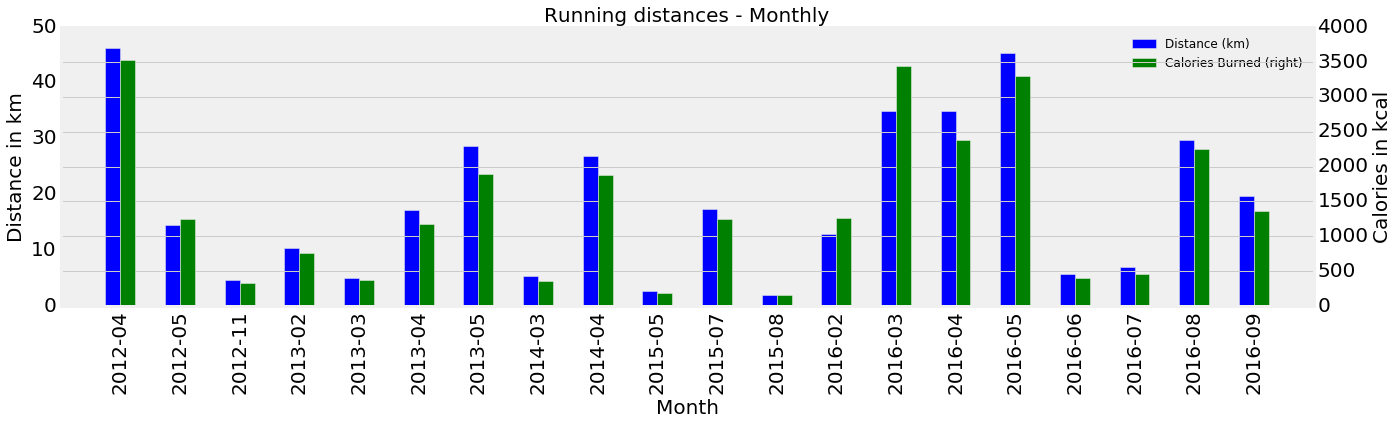

In [3]:
#Running 

#Monthy
r_monthly = run_data['Date'].dt.to_period('M')
w_monthly = walk_data['Date'].dt.to_period('M')
fsz=20;

# df['Calories Burned'] = 
ax = pd.groupby(run_data, r_monthly)['Distance (km)'].sum().plot(kind='bar',position=1,legend = True,width = .25, figsize = (20,5))
ax2 = pd.groupby(run_data, r_monthly)['Calories Burned'].sum().plot( secondary_y=True,legend = True,kind = 'bar',width = .25, color = 'green',position=0)
ax.set_xlim([-1, 20])


ax.set_xlabel('Month', fontsize = fsz)
ax.set_ylabel('Distance in km',fontsize = fsz)
ax2.set_ylabel('Calories in kcal',fontsize = fsz)

patches, labels = ax.get_legend_handles_labels()
labels = ['Distance', 'Calories Burned']
ax.set_title('Running distances - Monthly', fontsize = fsz)

ax.tick_params(axis='both', which='major', labelsize=fsz)
ax2.tick_params(axis='both', which='major', labelsize=fsz)
ax.grid(False)

fig = ax.get_figure()
fig.savefig('dist-cal-run-monthly.png',transparent=True, bbox_inches='tight', pad_inches=0)



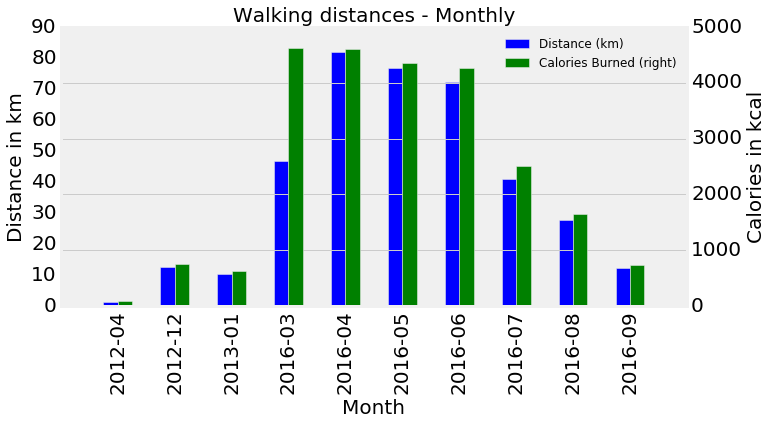

In [38]:
#Walking 

#Monthy

w_monthly = walk_data['Date'].dt.to_period('M')
fsz=20;

# df['Calories Burned'] = 
ax = pd.groupby(walk_data, w_monthly)['Distance (km)'].sum().plot(kind='bar',legend = True, position=1,width = .25, figsize = (10,5))
ax2 = pd.groupby(walk_data, w_monthly)['Calories Burned'].sum().plot( secondary_y=True,legend = True,kind = 'bar',width = .25, color = 'green',position=0)
ax.set_xlim([-1, 10])


ax.set_xlabel('Month', fontsize = fsz)
ax.set_ylabel('Distance in km',fontsize = fsz)
ax2.set_ylabel('Calories in kcal',fontsize = fsz)

labels = ['Distance', 'Calories Burned']
ax.set_title('Walking distances - Monthly', fontsize = fsz)

labels = ['Distance', 'Calories Burned']

ax.tick_params(axis='both', which='major', labelsize=fsz)
ax2.tick_params(axis='both', which='major', labelsize=fsz)

fig = ax.get_figure()
fig.savefig('dist-cal-walk-monthly.png',transparent=True, bbox_inches='tight', pad_inches=0)

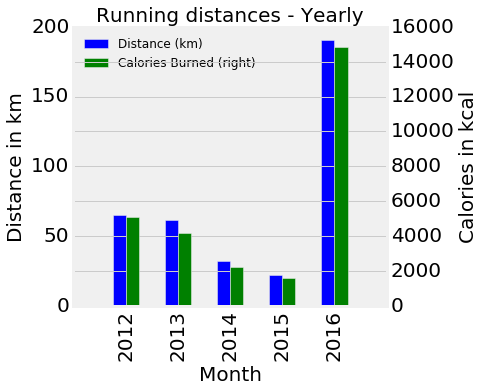

In [37]:
#Yearly Running

r_monthly = run_data['Date'].dt.to_period('A')
fsz=20;

# df['Calories Burned'] = 
ax = pd.groupby(run_data, r_monthly)['Distance (km)'].sum().plot(kind='bar',position=1,legend = True,width = .25, figsize = (5,5))
ax2 = pd.groupby(run_data, r_monthly)['Calories Burned'].sum().plot( secondary_y=True,legend = True,kind = 'bar',width = .25, color = 'green',position=0)
ax.set_xlim([-1, 5])


ax.set_xlabel('Month', fontsize = fsz)
ax.set_ylabel('Distance in km',fontsize = fsz)
ax2.set_ylabel('Calories in kcal',fontsize = fsz)

patches, labels = ax.get_legend_handles_labels()
labels = ['Distance', 'Calories Burned']
ax.set_title('Running distances - Yearly', fontsize = fsz)

ax.tick_params(axis='both', which='major', labelsize=fsz)
ax2.tick_params(axis='both', which='major', labelsize=fsz)

fig = ax.get_figure()
fig.savefig('dist-cal-run-yearly.png',transparent=True, bbox_inches='tight', pad_inches=0)

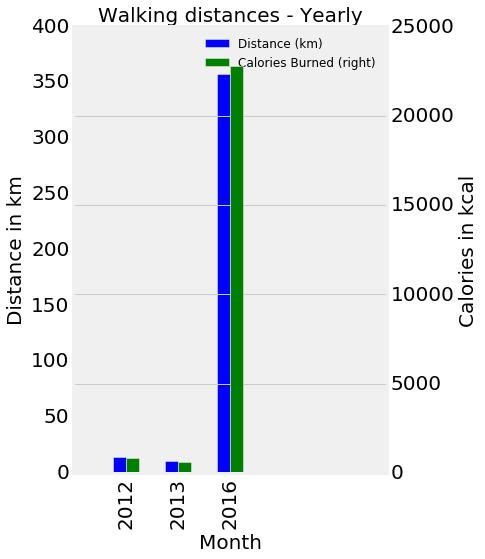

In [36]:
#Yearly Walking

w_monthly = walk_data['Date'].dt.to_period('A')
fsz=20;

# df['Calories Burned'] = 
ax = pd.groupby(walk_data, w_monthly)['Distance (km)'].sum().plot(kind='bar',position=1,legend = True,width = .25, figsize = (5,8))
ax2 = pd.groupby(walk_data, w_monthly)['Calories Burned'].sum().plot( secondary_y=True,legend = True,kind = 'bar',width = .25, color = 'green',position=0)
ax.set_xlim([-1, 5])


ax.set_xlabel('Month', fontsize = fsz)
ax.set_ylabel('Distance in km',fontsize = fsz)
ax2.set_ylabel('Calories in kcal',fontsize = fsz)

patches, labels = ax.get_legend_handles_labels()
labels = ['Distance', 'Calories Burned']
ax.set_title('Walking distances - Yearly', fontsize = fsz)

ax.tick_params(axis='both', which='major', labelsize=fsz)
ax2.tick_params(axis='both', which='major', labelsize=fsz)

fig = ax.get_figure()
fig.savefig('dist-cal-walk-yearly.png',transparent=True, bbox_inches='tight', pad_inches=0)

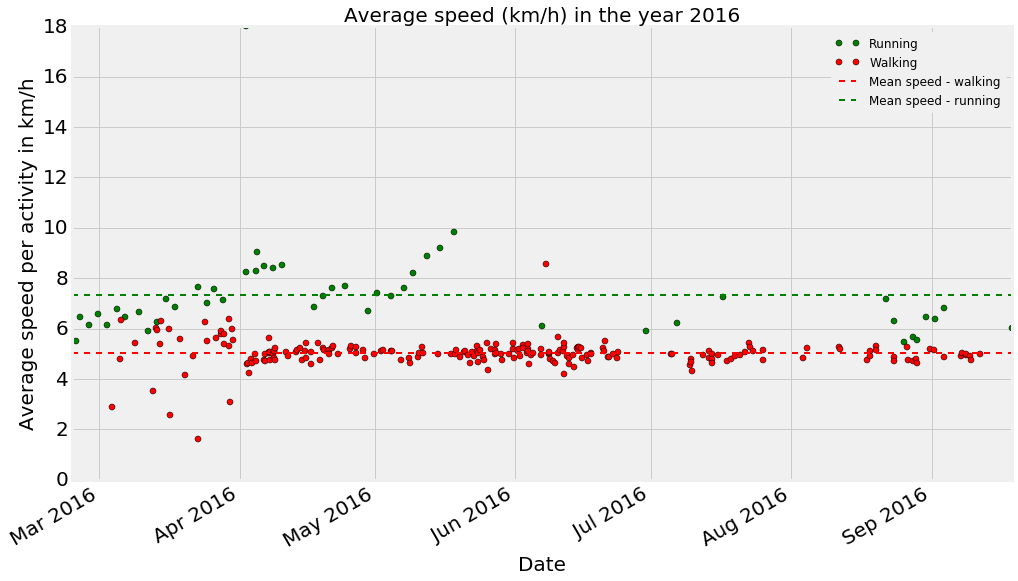

In [42]:
#Average pace for running and walking 
#Y, M, D
import datetime as dt     
start_range = datetime.datetime(2016 ,1, 1)
end_range = dt.datetime.today()


# %pylab inline
# pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots


avgspeed_walk = pd.DataFrame()
avgspeed_run = pd.DataFrame()
avgspeed_walk_run = pd.DataFrame()



# avgspeed_walk[['Date','Walking','Type']]  = walk_data[['Date', 'Average Speed (km/h)','Type']]
# avgspeed_run[['Date', 'Running','Type']]  = run_data[['Date','Average Speed (km/h)','Type']]

avgspeed_walk[['Date','Walking','Type']]  = walk_data[['Date', 'Average Speed (km/h)','Type']]
avgspeed_run[['Date', 'Running','Type']]  = run_data[['Date','Average Speed (km/h)','Type']]


avgspeed_run.set_index('Date', inplace = True)
avgspeed_walk.set_index('Date', inplace = True)


avgspeed_run = avgspeed_run[end_range:start_range]
avgspeed_walk = avgspeed_walk[end_range:start_range]



ax = avgspeed_run.plot(marker='o', linestyle = 'None', color = 'green')
avgspeed_walk.plot(ax = ax, marker='o', linestyle = 'None', color = 'red')


avgspeed_walk_mean = avgspeed_walk['Walking'].mean()
ax.axhline(avgspeed_walk_mean, color='r', linestyle='--',linewidth = 2, label = 'Mean speed - walking')

avgspeed_run_mean = avgspeed_run['Running'].mean()
ax.axhline(avgspeed_run_mean, color='g', linestyle='--',linewidth = 2,label = 'Mean speed - running')

pylab.legend(loc='upper right')
patches, labels = ax.get_legend_handles_labels()
labels = ['Date', 'Average speed per activity']
ax.set_label(labels)
ax.set_title('Average speed (km/h) in the year 2016', fontsize = fsz)
ax.tick_params(axis='both', which='major', labelsize=fsz)

ax.set_ylabel('Average speed per activity in km/h', fontsize = fsz)
ax.set_xlabel('Date',fontsize = fsz)

fig = ax.get_figure()
fig.savefig('avg-speed-this-year.png',transparent=True, bbox_inches='tight', pad_inches=0)

In [61]:
plt.style.available


[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']